<a href="https://colab.research.google.com/github/valihuseyin/AI_101/blob/main/Huseyin_Karadag_Advertising_MultiLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Görev:

TV, Radyo ve Gazete ilanlarına göre satış rakamları var.

Buradan Sales Sütunu hedef yani y=df['Sales'].
TV, radyo ve gazeteye ayrı ayrı ne kadar yatırım yaparsam satış rakamlarım ne kadar artar sorusuna cevap arayacaksınız ve Hangi reklam yönteminin daha başarılı olduğunu bulacaksınız. Test olarak ayırdığınız veri ile tahmin ettiğiniz veriyi aynı grafikte line chart ile görselleştireceksiniz.

Bu problem çok değişkenli doğrusal regresyon ile çözülebilir. Elimizde:

Özellikler (X): TV, Radio, Newspaper reklam harcamaları

Hedef (y): Sales

Amaç:

Her reklam kanalının satışa katkısını ölçmek (katsayılar).

Modeli test seti üzerinde değerlendirmek.

Gerçek değerler ile tahminleri aynı line chart üzerinde göstermek.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
lr_model = LinearRegression()

In [5]:
#read data
df = pd.read_csv('advertising.csv')

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
x =df [['TV','Radio','Newspaper']]
y =df[['Sales']]

In [8]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [9]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [10]:
#train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=34)

In [11]:
# modelimiz lr_model besleyelim
lr_model.fit(x_train,y_train)

LinearRegression()

In [12]:
tahmin = lr_model.predict(x_test)

In [ ]:
tahmin

array([[17.33089326],
       [ 6.75657771],
       [24.30904964],
       [ 5.0515769 ],
       [15.54271689],
       [19.29966726],
       [10.65153419],
       [ 9.47040745],
       [ 7.62877327],
       [18.56995309],
       [10.40850671],
       [16.96844045],
       [ 4.13394635],
       [ 5.75005469],
       [14.92883965],
       [17.95988405],
       [15.28407964],
       [17.6009688 ],
       [16.35119177],
       [16.38081251],
       [10.19630447],
       [ 6.31423514],
       [11.70398085],
       [21.39454865],
       [ 8.64541883],
       [ 9.5062513 ],
       [21.74650212],
       [ 7.90163093],
       [ 4.15147714],
       [18.46125392],
       [15.24139197],
       [14.57384327],
       [ 7.59848042],
       [ 9.98613533],
       [15.52765483],
       [11.68497014],
       [21.21024866],
       [ 9.28154151],
       [23.93423273],
       [ 4.12087818]])

Katsayılar (Coefficient):

TV için katsayı en yüksekse, TV reklamına 1 birim daha fazla yatırım yapıldığında satışların ortalama artış miktarını gösterir.

Radio için katsayı da pozitifse radyo reklamı da katkı sağlar.

Newspaper katsayısı genelde çok küçük veya anlamsız çıkar → gazete reklamı satışlara çok az etki eder.

R² skoru: Modelin test setinde veriyi ne kadar açıkladığını gösterir.

In [13]:
lr_model.coef_

array([[ 0.04698715,  0.19360408, -0.00120282]])

In [14]:
lr_model.intercept_

array([2.55693148])

In [15]:
#"MSE:",
mean_squared_error(y_test, tahmin)

3.1911211213641772

In [16]:
#"R2 Score:"
r2_score(y_test, tahmin)

0.8925087896627704

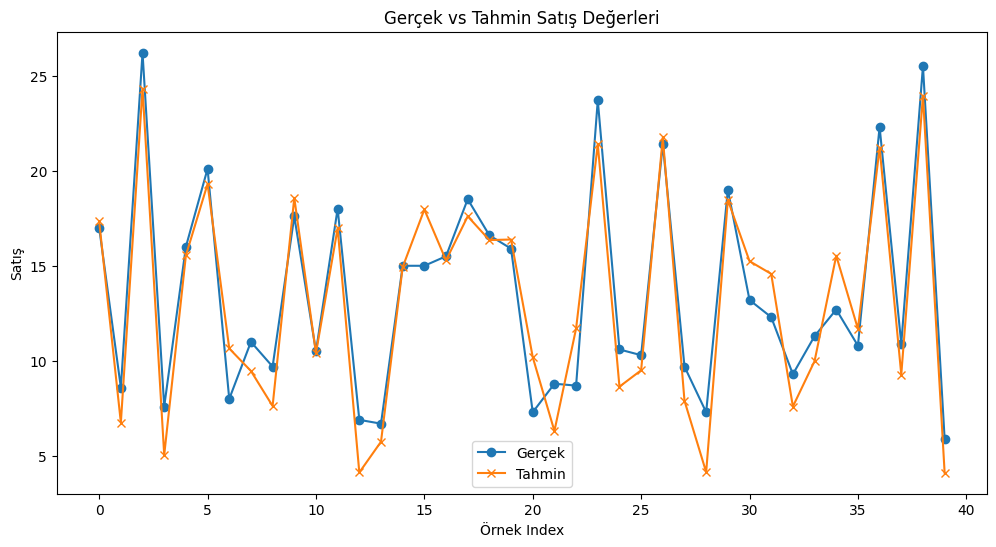

In [17]:
# Visualization
plt.figure(figsize=(12,6))
plt.plot(range(len(y_test)), y_test.values, label="Gerçek", marker='o')
plt.plot(range(len(tahmin)), tahmin, label="Tahmin", marker='x')
plt.xlabel("Örnek Index")
plt.ylabel("Satış")
plt.title("Gerçek vs Tahmin Satış Değerleri")
plt.legend()
plt.show()

In [ ]:
tahmin

array([[17.33089326],
       [ 6.75657771],
       [24.30904964],
       [ 5.0515769 ],
       [15.54271689],
       [19.29966726],
       [10.65153419],
       [ 9.47040745],
       [ 7.62877327],
       [18.56995309],
       [10.40850671],
       [16.96844045],
       [ 4.13394635],
       [ 5.75005469],
       [14.92883965],
       [17.95988405],
       [15.28407964],
       [17.6009688 ],
       [16.35119177],
       [16.38081251],
       [10.19630447],
       [ 6.31423514],
       [11.70398085],
       [21.39454865],
       [ 8.64541883],
       [ 9.5062513 ],
       [21.74650212],
       [ 7.90163093],
       [ 4.15147714],
       [18.46125392],
       [15.24139197],
       [14.57384327],
       [ 7.59848042],
       [ 9.98613533],
       [15.52765483],
       [11.68497014],
       [21.21024866],
       [ 9.28154151],
       [23.93423273],
       [ 4.12087818]])

In [18]:
sonuc = pd.DataFrame({
    "Reklam Kanalı": x.columns,
    "Katsayı": lr_model.coef_.ravel()
}).sort_values(by="Katsayı", ascending=False)

In [19]:
x.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [20]:
sonuc

,Reklam Kanalı,Katsayı
1,Radio,0.193604
0,TV,0.046987
2,Newspaper,-0.001203


In [21]:
sonuc.iloc[0]

,1
Reklam Kanalı,Radio
Katsayı,0.193604


In [22]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet #Regulatixation regression modelleri

In [23]:
R=Ridge()
L=Lasso()
E=ElasticNet()

In [24]:
Rmodel=R.fit(x_train,y_train)

In [25]:
tahminR=Rmodel.predict(x_test)

In [26]:
r2_score(y_test,tahminR)

0.8925112864367609

In [27]:
mean_squared_error(y_test,tahminR)**0.5

1.7863501893380558

In [35]:
sonucR = pd.DataFrame({
    "Reklam Kanalı": x.columns,
    "Katsayı": Rmodel.coef_.ravel()
}).sort_values(by="Katsayı", ascending=False)

In [36]:
sonucR

,Reklam Kanalı,Katsayı
1,Radio,0.193598
0,TV,0.046987
2,Newspaper,-0.001202


In [28]:
L.fit(x_train,y_train)

Lasso()

In [29]:
tahminL=L.predict(x_test)

In [30]:
r2_score(y_test,tahminL)

0.8947327116331307

In [37]:
sonucL = pd.DataFrame({
    "Reklam Kanalı": x.columns,
    "Katsayı": L.coef_.ravel()
}).sort_values(by="Katsayı", ascending=False)
sonucL

,Reklam Kanalı,Katsayı
1,Radio,0.188385
0,TV,0.046834
2,Newspaper,-0.000000


In [31]:
E.fit(x_train,y_train)

ElasticNet()

In [32]:
tahminE=E.predict(x_test)

In [33]:
r2_score(y_test,tahminE)

0.8938554171895828

In [38]:
sonucE = pd.DataFrame({
    "Reklam Kanalı": x.columns,
    "Katsayı": E.coef_.ravel()
}).sort_values(by="Katsayı", ascending=False)
sonucE

,Reklam Kanalı,Katsayı
1,Radio,0.190288
0,TV,0.046899
2,Newspaper,-0.000000


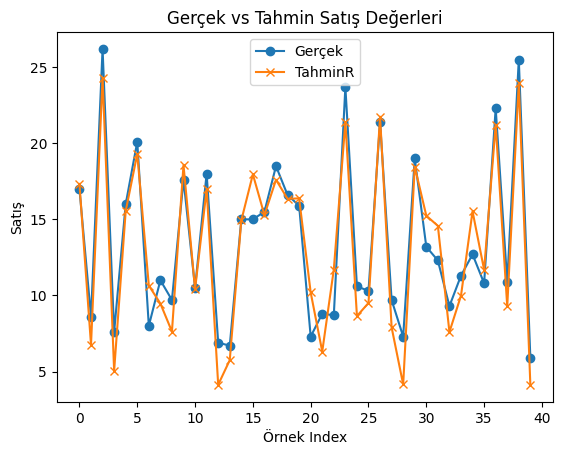

In [34]:
plt.plot(range(len(y_test)), y_test.values, label="Gerçek", marker='o')
plt.plot(range(len(tahminR)), tahminR, label="TahminR", marker='x')
plt.xlabel("Örnek Index")
plt.ylabel("Satış")
plt.title("Gerçek vs Tahmin Satış Değerleri")
plt.legend()
plt.show()

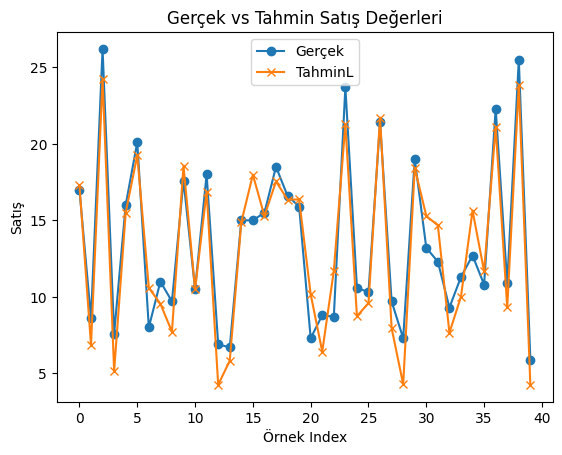

In [39]:
plt.plot(range(len(y_test)), y_test.values, label="Gerçek", marker='o')
plt.plot(range(len(tahminL)), tahminL, label="TahminL", marker='x')
plt.xlabel("Örnek Index")
plt.ylabel("Satış")
plt.title("Gerçek vs Tahmin Satış Değerleri")
plt.legend()
plt.show()

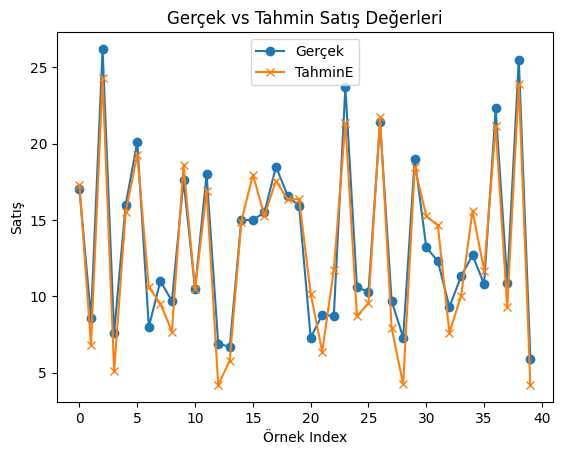

In [40]:
plt.plot(range(len(y_test)), y_test.values, label="Gerçek", marker='o')
plt.plot(range(len(tahminE)), tahminE, label="TahminE", marker='x')
plt.xlabel("Örnek Index")
plt.ylabel("Satış")
plt.title("Gerçek vs Tahmin Satış Değerleri")
plt.legend()
plt.show()

In [41]:
#decision tree
from sklearn.tree import DecisionTreeRegressor

In [42]:
dt= DecisionTreeRegressor()

In [43]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [44]:
tahmindt=dt.predict(x_test)

In [45]:
r2_score(y_test,tahmindt)

0.9742566469977456

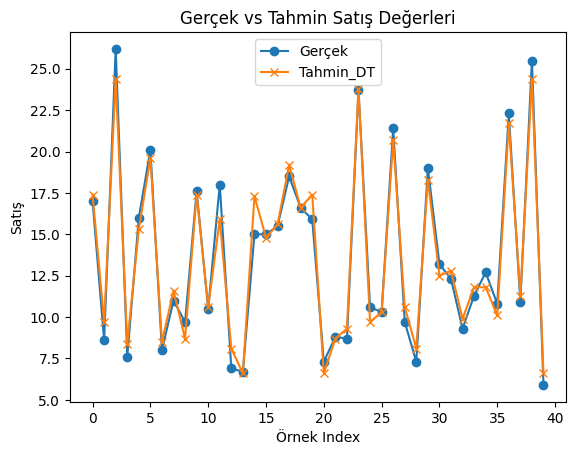

In [46]:
plt.plot(range(len(y_test)), y_test.values, label="Gerçek", marker='o')
plt.plot(range(len(tahmindt)), tahmindt, label="Tahmin_DT", marker='x')
plt.xlabel("Örnek Index")
plt.ylabel("Satış")
plt.title("Gerçek vs Tahmin Satış Değerleri")
plt.legend()
plt.show()

In [50]:
from sklearn.ensemble import ExtraTreesRegressor

In [51]:
ET=ExtraTreesRegressor()

In [52]:
ET.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesRegressor()

In [53]:
tahminET=ET.predict(x_test)

In [54]:
r2_score(y_test,tahminET)

0.992887824834041

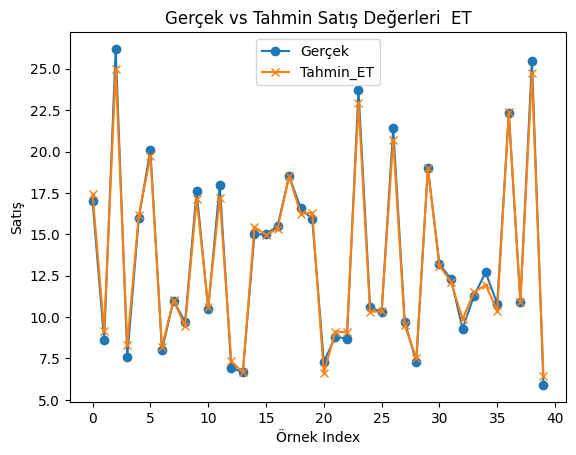

In [56]:
plt.plot(range(len(y_test)), y_test.values, label="Gerçek", marker='o')
plt.plot(range(len(tahminET)), tahminET, label="Tahmin_ET", marker='x')
plt.xlabel("Örnek Index")
plt.ylabel("Satış")
plt.title("Gerçek vs Tahmin Satış Değerleri  ET")
plt.legend()
plt.show()